Number of rice grains 108


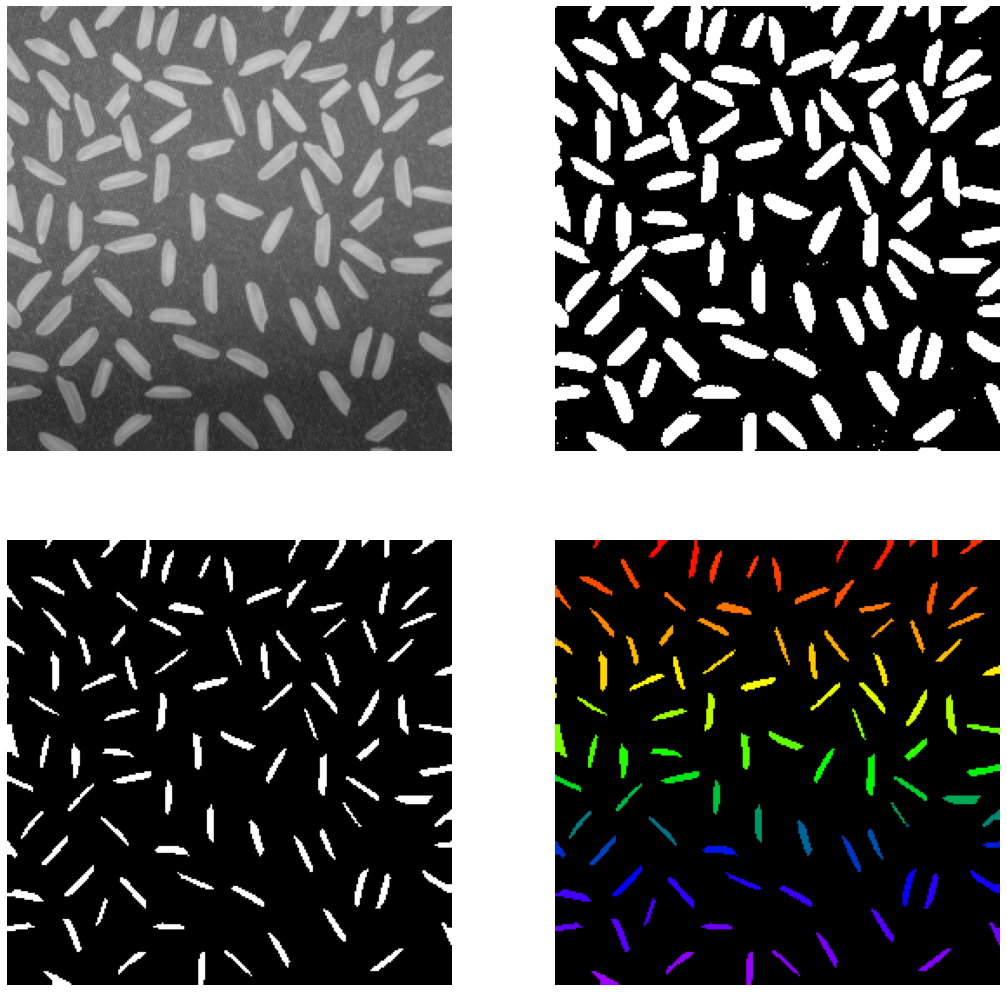

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread('./a01images/rice.png',cv.IMREAD_GRAYSCALE)
#img = cv.imread('image3.jpg',cv.IMREAD_GRAYSCALE)
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.waitKey(0)

#Adaptive Thresholding
#dst	=	cv.adaptiveThreshold(	src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	)
thres_image = cv.adaptiveThreshold (img, 255.0, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 45, -10.0)

# removeing the white dots using erode interatively 
kernel = np.ones((5,5),np.uint8)
erosion_image = cv.erode(thres_image, kernel)

# counting the pixel with value =255 and then filling the connected pixels to stop recounting 
pro_imgage = erosion_image.copy()
rice_count = 0
rows, cols = pro_imgage.shape
for j in range(rows):
    for i in range(cols):
        pixel = pro_imgage[j, i]
        if 255 == pixel:
            rice_count += 1
            cv.floodFill(pro_imgage, None, (i, j), rice_count) #fill the every connected pixels with different value
print("Number of rice grains", rice_count)

#Show connected components using a color Map
(min, max, minLoc, maxLoc) = cv.minMaxLoc(pro_imgage) #get max,min pixels
pro_imgage = (255/(max-min)) * (pro_imgage - min)   # Normalize
imgColorMap = cv.applyColorMap(pro_imgage.astype('uint8'), cv.COLORMAP_RAINBOW) #create color map
imgColorMap[pro_imgage==0] = 0 #set the backroud as black
plt.imshow(imgColorMap[:,:,::-1]) #show color map

cv.namedWindow('thres',cv.WINDOW_NORMAL)
cv.imshow('thres',thres_image)
cv.waitKey(0)
cv.destroyAllWindows()
fig,ax = plt.subplots(2,2,  figsize=(18,18))
ax[0,0].imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax[0,0].axis("off")
ax[0,1].imshow(cv.cvtColor(output_adapthresh,  cv . COLOR_BGR2RGB))
ax[0,1].axis("off")
ax[1,0].imshow(cv.cvtColor(erosion_img,  cv . COLOR_BGR2RGB))
ax[1,0].axis("off")
ax[1,1].imshow(cv.cvtColor(processing_img,  cv . COLOR_BGR2RGB))
ax[1,1].axis("off")

